In [6]:
import os
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
if os.name == 'nt' : # windows OS
    font_family = "Malgun Gothic"
else : #Mac OS
    font_family = "AppleGothic"
    
# 값이 깨지는 문제 해결을 위해 파라미터값 설정
sns.set(font=font_family, rc ={"axes.unicode_minus" : False})

In [7]:
## 기대값이 70이고 표준편차가 10인 정규분포 생성
norm = stats.norm(loc = 70,scale=10)

In [8]:
## 구간 내에 숫자를 균일한 간격으로 생성 (x축)
# -10 ~150까지 2000개 생성
s_x = np.linspace(-10, 150, 2000)

## 확률밀도함수
s_pdf = norm.pdf(s_x)

In [10]:
## 확률 밀도함수 게산 위와 똑같은 것
# 산식으로 표현한 것
mu = 70
sigma = 10
s_pdf_cal = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(s_x-mu)**2 / (2 * sigma**2))

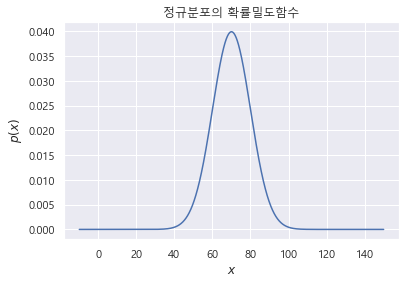

In [11]:
# 정규분포 시각화
plt.plot(s_x, s_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

In [13]:
## 누적 분포 함수
s_cdf = norm.cdf(s_x)

## 누적 분포함수 계산
from scipy.special import erf # 오차함수
s_cdf_cal = 0.5 * (1 + erf((s_x-mu) / (np.sqrt(2 * sigma**2))))

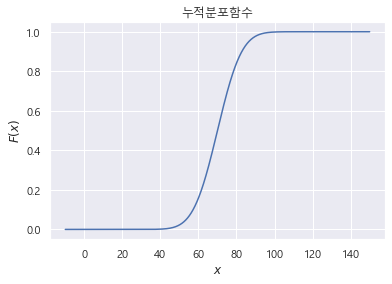

In [14]:
## 누적 분포 함수 시각화
plt.plot(s_x, s_cdf)
plt.title('누적분포함수')
plt.xlabel('$x$')
plt.ylabel('$F(x)$')
plt.show()

In [19]:
## 기대값이 0이고 표준편차가 1인 정규분포
stan_norm = stats.norm(loc=0, scale=1)
# 구간 내에 숫자를 균일한 간격으로 생성 (x축)
# -5 ~ 5 까지 1000개 생성
sn_x = np.linspace(-5, 5, 1000)

# 확률밀도함수
sn_pdf = stan_norm.pdf(sn_x)

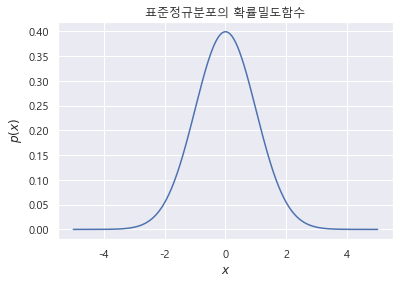

In [20]:
# 정규분포 시각화
plt.plot(sn_x, sn_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

In [21]:
## 연속확률분포 - 표준화
n_data = np.random.randint(1, 100, size = 1000) # 랜덤으로 값 만들어오기 1에서 100까지 1000개
n_data = np.sort(n_data)

In [23]:
n_data.shape

(1000,)

In [24]:
## n_data 의 평균과 표준편차 계산
n_mean = np.mean(n_data)
print('mean :' , np.mean(n_data))

n_std = np.std(n_data)
print('Standard deviation : ', np.std(n_data))

mean : 49.67
Standard deviation :  29.10273354858612


In [25]:
## 확률 밀도 함수
norm_n_data = stats.norm(loc = n_mean, scale = n_std)

#norm = 확률밀도함수

n_pdf = norm_n_data.pdf(n_data) # pdf = 확률밀도함수 매서드

In [26]:
n_data.shape

(1000,)

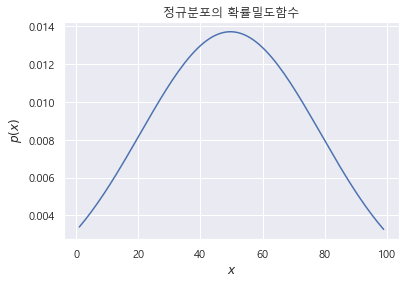

In [29]:
## 정규분포 시각화

plt.plot(n_data, n_pdf)
plt.title('정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

In [31]:
## 표준화 수행
z_data = list(n_data)
z_data_list = []

for i in z_data :
    z = (i - n_mean) / n_std
    z_data_list.append(z)

In [34]:
## 표준정규분포 확률밀도함수
norm_z_data = stats.norm(loc=0, scale =1)
z_pdf = norm_z_data.pdf(z_data_list)

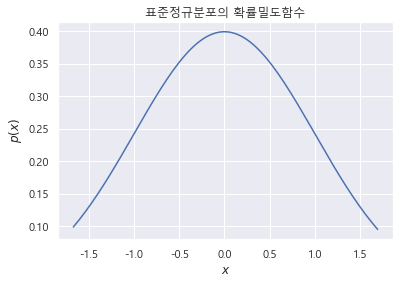

In [35]:
## 표준정규분포 시각화

plt.plot(z_data_list, z_pdf)
plt.title('표준정규분포의 확률밀도함수')
plt.xlabel('$x$')
plt.ylabel('$p(x)$')
plt.show()

In [ ]:
''' 카이제곱 분포 '''

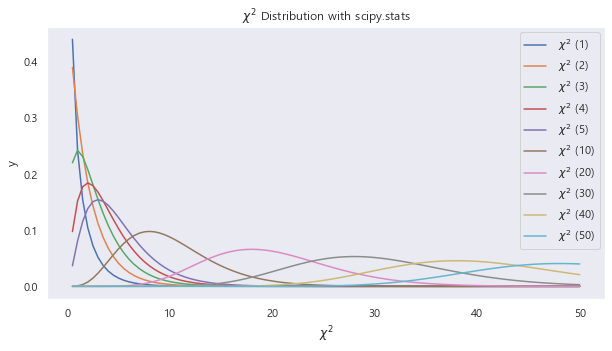

In [50]:
## 카이제곱분포 표현

# 카이제곱  = 분산 제곱. chi2() = 카이제곱분포

from scipy.stats import chi2

## 라인스페이스 x축 설정
Chi_X = np.linspace(0.5, 50, 100)

# 자유도에 따른 카이제곱분포 시각화
plt.figure(figsize = (10,5))
for dof in [1,2,3,4,5,10,20,30,40,50] :
    plt.plot(Chi_X, stats.chi2(dof).pdf(Chi_X),
            label = r' $\chi^2$ (' + str(dof) + ')')
    
    
plt.xlabel(r'$\chi^2$')
plt.ylabel("y")
plt.grid()
plt.title(r'$\chi^2$ Distribution with scipy.stats')
plt.legend()
plt.show()
          

In [40]:
## 카이제곱 분포를 이용한 적합성 검정
## 한 개의 '판매지역' 명목 변수에 값 확인 결과 서울, 인천, 대구 지역에서 판매
## 교차분석표 생성(자유도 2)

# 관찰도수
x_o = [324, 78, 261]
# 기대도수
x_e = [371, 80, 212]

# 지역별 A제품의 판매수
x_crosstab = pd.DataFrame([x_o, x_e],
                          columns = ['서울', '인천', '대구'],
                          index = ['관찰도수', '기대도수'])

In [41]:
x_crosstab

,서울,인천,대구
관찰도수,324,78,261
기대도수,371,80,212


In [44]:
## 카이제곱 통계량 계산
from scipy.stats import chisquare

result = chisquare(x_o, f_exp = x_e)
result

# p-value 가 0.0001725fh dbdmltnwns 0.05 보다 작으므로 귀무가설 기각, 대립가설 채택.
# 즉, 관찰빈도와 기대빈도는 다르다

Power_divergenceResult(statistic=17.329649595687332, pvalue=0.00017254977751013492)

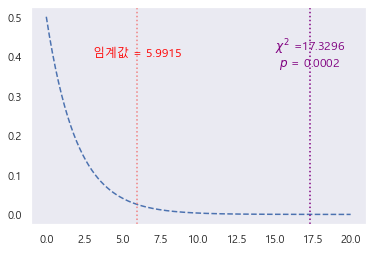

In [49]:
## 위사례의 ㅋ카이제곱분포 시각화
from scipy.stats import chi2

dof = 2 # 자유도
x_chi_l = np.linspace(0, 20, 201)
pdf_chi = chi2(dof).pdf(x_chi_l)

# 유의수준 5%
x95_c = chi2(dof).ppf(.95) # ppf
plt.plot(x_chi_l, pdf_chi, 'b--')

# 95% 의 임계값 표시
plt.axvline(x = x95_c, color = 'lightcoral', linestyle = ':')
plt.text(x95_c, .4, '임계값 = ' + str(round(x95_c, 4)),
        horizontalalignment = 'center', color = 'red')

# 위에서 구한 카이분포 통계값 = result[0]
plt.axvline(x = result[0], color = 'purple', linestyle = ':')
plt.text(result[0], .4, r'$\chi^2$ =' + str(round(result[0], 4)), va = 'bottom',
        horizontalalignment = 'center', color = 'purple'),
plt.text(result[0], .4, r'$p$ = ' + str(round(result[1], 4)), va = 'top',
        horizontalalignment = 'center', color = 'purple')
plt.grid()
plt.show()